In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('standardized.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 61 columns):
Unnamed: 0             2720 non-null int64
Angle                  2720 non-null float64
Balls                  2720 non-null float64
BatterId               2720 non-null float64
BatterSide             2720 non-null float64
Bearing                2720 non-null float64
Direction              2720 non-null float64
Distance               2720 non-null float64
ExitSpeed              2720 non-null float64
Extension              2720 non-null float64
HangTime               2720 non-null float64
HitSpinRate            609 non-null float64
HorzApprAngle          2720 non-null float64
HorzBreak              2720 non-null float64
HorzRelAngle           2720 non-null float64
InducedVertBreak       2720 non-null float64
Inning                 2720 non-null float64
LastTrackedDistance    2720 non-null float64
Outs                   2720 non-null float64
OutsOnPlay             2720 non-null floa

In [5]:
data['PlayResult'].value_counts(normalize=True)*100

0.0    69.448529
1.0    30.551471
Name: PlayResult, dtype: float64

In [8]:
data.head()

,Angle,Balls,BatterId,BatterSide,Bearing,Direction,Distance,ExitSpeed,Extension,HangTime,...,y0,z0,PlayResult,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B
0,0.868350,0.333333,0.008253,0.0,0.344629,0.275039,0.114493,0.762034,0.440210,0.100554,...,0.0,0.612225,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.918357,1.000000,0.008253,0.0,0.516395,0.502234,0.182942,0.824455,0.439004,0.154778,...,0.0,0.581026,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.958225,0.000000,0.008249,1.0,0.189803,0.094132,0.480273,0.863455,0.382890,0.433793,...,0.0,0.822690,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.947422,0.000000,0.008245,1.0,0.319267,0.235321,0.354489,0.752272,0.416613,0.340720,...,0.0,0.817933,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.642050,0.000000,0.008253,0.0,0.481782,0.496386,0.015647,0.704999,0.445239,0.007351,...,0.0,0.658726,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
data = data.loc[:, data.columns != 'Unnamed: 0']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 60 columns):
Angle                  2720 non-null float64
Balls                  2720 non-null float64
BatterId               2720 non-null float64
BatterSide             2720 non-null float64
Bearing                2720 non-null float64
Direction              2720 non-null float64
Distance               2720 non-null float64
ExitSpeed              2720 non-null float64
Extension              2720 non-null float64
HangTime               2720 non-null float64
HitSpinRate            609 non-null float64
HorzApprAngle          2720 non-null float64
HorzBreak              2720 non-null float64
HorzRelAngle           2720 non-null float64
InducedVertBreak       2720 non-null float64
Inning                 2720 non-null float64
LastTrackedDistance    2720 non-null float64
Outs                   2720 non-null float64
OutsOnPlay             2720 non-null float64
PAofInning             2720 non-null fl

In [10]:
# Reduce Dataset to important features + playresult
data_cluster = data[['Angle',
                    'Direction',
                   'HangTime',
                   'LastTrackedDistance',
                   'ExitSpeed',
                    '3B',
                     '5_6_Hole',
                     'SS',
                     'Up_the_Middle',
                     '2B',
                     '3_4_Hole',
                     '1B',
                   'PlayResult']]
# data_cluster = data[['Angle', 'PositionAt110Y','HangTime','HitSpinRate','PositionAt110X','LastTrackedDistance','ExitSpeed','Bearing','PlayResult']]
data_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 13 columns):
Angle                  2720 non-null float64
Direction              2720 non-null float64
HangTime               2720 non-null float64
LastTrackedDistance    2720 non-null float64
ExitSpeed              2720 non-null float64
3B                     2720 non-null float64
5_6_Hole               2720 non-null float64
SS                     2720 non-null float64
Up_the_Middle          2720 non-null float64
2B                     2720 non-null float64
3_4_Hole               2720 non-null float64
1B                     2720 non-null float64
PlayResult             2720 non-null float64
dtypes: float64(13)
memory usage: 276.4 KB


In [11]:
data_cluster.head()

,Angle,Direction,HangTime,LastTrackedDistance,ExitSpeed,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B,PlayResult
0,0.868350,0.275039,0.100554,0.121342,0.762034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.918357,0.502234,0.154778,0.190322,0.824455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.958225,0.094132,0.433793,0.469123,0.863455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.947422,0.235321,0.340720,0.370906,0.752272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.642050,0.496386,0.007351,0.020443,0.704999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
data_cluster.to_csv('original.csv')

In [13]:
# K-Means Clustering with Elbow Method
X = data_cluster.iloc[:,0:12]
y = data_cluster.iloc[:,-1]

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2720 entries, 0 to 2719
Data columns (total 12 columns):
Angle                  2720 non-null float64
Direction              2720 non-null float64
HangTime               2720 non-null float64
LastTrackedDistance    2720 non-null float64
ExitSpeed              2720 non-null float64
3B                     2720 non-null float64
5_6_Hole               2720 non-null float64
SS                     2720 non-null float64
Up_the_Middle          2720 non-null float64
2B                     2720 non-null float64
3_4_Hole               2720 non-null float64
1B                     2720 non-null float64
dtypes: float64(12)
memory usage: 255.1 KB


In [15]:
y.count()

2720

In [16]:
data_cluster.head()

,Angle,Direction,HangTime,LastTrackedDistance,ExitSpeed,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B,PlayResult
0,0.868350,0.275039,0.100554,0.121342,0.762034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.918357,0.502234,0.154778,0.190322,0.824455,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.958225,0.094132,0.433793,0.469123,0.863455,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.947422,0.235321,0.340720,0.370906,0.752272,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.642050,0.496386,0.007351,0.020443,0.704999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


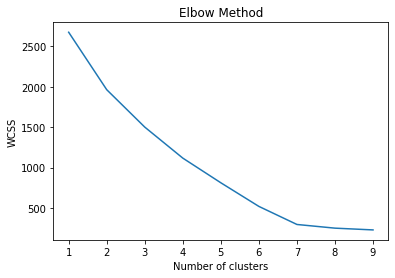

In [17]:
# Elbow Method

wcss = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init=10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Silhouette Analysis: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a


In [19]:
kmeans = KMeans(n_clusters=7, init='k-means++',max_iter=300,n_init=10,random_state=0)
pred_y = kmeans.fit_predict(X)

data_cluster['cluster #'] = pred_y


/Users/ayusharora/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
data_cluster.to_csv('cluster_strategic.csv')

In [21]:
data_cluster.groupby('cluster #').count()

,Angle,Direction,HangTime,LastTrackedDistance,ExitSpeed,3B,5_6_Hole,SS,Up_the_Middle,2B,3_4_Hole,1B,PlayResult
cluster #,,,,,,,,,,,,,
0,424,424,424,424,424,424,424,424,424,424,424,424,424
1,898,898,898,898,898,898,898,898,898,898,898,898,898
2,345,345,345,345,345,345,345,345,345,345,345,345,345
3,350,350,350,350,350,350,350,350,350,350,350,350,350
4,268,268,268,268,268,268,268,268,268,268,268,268,268
5,247,247,247,247,247,247,247,247,247,247,247,247,247
6,188,188,188,188,188,188,188,188,188,188,188,188,188
